### Importing libraries

In [1]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

### Preparing Data for Training

In [2]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size=(img_size, img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_train.flow_from_directory("test/",
                                                         target_size=(img_size, img_size),
                                                         color_mode="grayscale",
                                                         batch_size=batch_size,
                                                         class_mode="categorical",
                                                         shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Defining Model

In [3]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    return x

In [4]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    return x

In [5]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32, (3, 3))
    conv_2 = Convolution(conv_1, 64, (5, 5))
    conv_3 = Convolution(conv_2, 128, (3, 3))

    flatten = Flatten()(conv_3)

    dense_1 = Dense_f(flatten, 256)

    output = Dense(7, activation="softmax")(dense_1)
    model = Model(inputs=[inputs], outputs=[output])

    model.compile(loss=['categorical_crossentropy'], optimizer='adam', metrics=['accuracy'])

    return model

In [6]:
model = model_fer((48, 48, 1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0     

### Initializing the Model

In [7]:
epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights_RTED.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
callbacks = [checkpoint]

### Training the Model

In [8]:
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 1.6759 - accuracy: 0.3660
Epoch 1: saving model to model_weights_RTED.h5
448/448 [==============================] - 872s 2s/step - loss: 1.6759 - accuracy: 0.3660 - val_loss: 1.4813 - val_accuracy: 0.4311
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.4117 - accuracy: 0.4580
Epoch 2: saving model to model_weights_RTED.h5
448/448 [==============================] - 334s 745ms/step - loss: 1.4117 - accuracy: 0.4580 - val_loss: 1.3426 - val_accuracy: 0.4863
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.3032 - accuracy: 0.5018
Epoch 3: saving model to model_weights_RTED.h5
448/448 [==============================] - 376s 840ms/step - loss: 1.3032 - accuracy: 0.5018 - val_loss: 1.3581 - val_accuracy: 0.4828
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.2445 - accuracy: 0.5269
Epoch 4: saving model to model_weights_RTED.h5
448/448 [=================

### Model Evaluation

In [9]:
model.evaluate(validation_generator)

113/113 [==============================] - 23s 199ms/step - loss: 1.0906 - accuracy: 0.5899


[1.0905508995056152, 0.5898578763008118]

### Plotting Loss

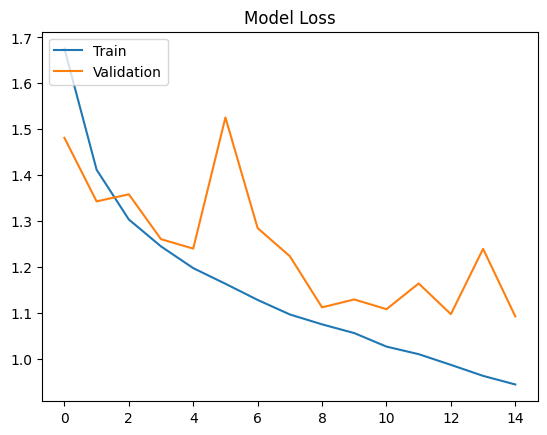

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Plotting Accuracy

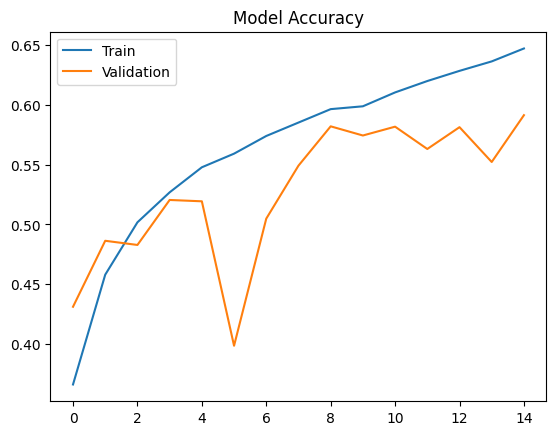

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Saving Model

In [12]:
model_json = model.to_json()
with open("model_RTED.json", "w") as json_file:
    json_file.write(model_json)